# Lesson1 手書き文字認識をしよう（ニューラルネットワーク入門）

## 目次

- 3.4の解答
- Section4 実装②
  - 4.1 Fashion MNIST
  - 4.2 実装

## 3.4の解答

1. 損失関数のパラメータ微分のことを何というか  
  ①スケーリング　**②勾配**　③学習率　④SGD
2. 活性化関数の選択により対処可能な問題を何というか  
  **①勾配消失問題**　②次元の呪い　③固有値問題　④バイアス―バリアンストレードオフ
3. 損失関数にペナルティ項を加え、パラメータの自由度を下げる手法を何というか  
  ①モーメンタム　②部分空間法　**③正則化**　④誤差逆伝播法
4. 過学習への対処としてふさわしくないものはどれか  
  ①ドロップアウト　**②スケーリング**　③ElasticNet　④早期終了

## Section4 実装②

最後に、この章の復習として、ファッションデータの分類をMLPを用いて行ってみましょう。

### 4.1 Fashion MNIST

In [1]:
# データのロード
from tensorflow.keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [2]:
# データセットの大きさ確認
print(x_train.shape) # 訓練データのサイズ
print(x_test.shape) # テストデータのサイズ
print(x_train[0])

(60000, 28, 28)
(10000, 28, 28)
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   

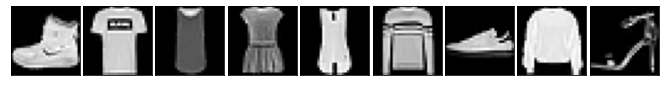

In [3]:
# データセットの表示
%matplotlib inline
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(9, 15))
fig.subplots_adjust(left=0, right=1, bottom=0, top=0.5, hspace=0.05, wspace=0.05)

for i in range(9):
    ax = fig.add_subplot(1, 9, i + 1, xticks=[], yticks=[])
    ax.imshow(x_train[i], cmap='gray')

### 4.2 実装

In [4]:
# データの整形
from tensorflow.keras.utils import to_categorical

x_train = x_train.reshape(-1, 784) / 255
x_test = x_test.reshape(-1, 784) /255
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [5]:
# モデル構築
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout

model = Sequential()

model.add(Dense(512, input_shape=(784,), activation='relu', kernel_initializer='he_normal'))
model.add(Dense(256, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(128, activation='relu', kernel_initializer='he_normal'))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(32, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 比較用にsection2と類似のモデルを準備
model0 = Sequential()

model0.add(Dense(units=256, input_shape=(784,)))
model0.add(Activation('relu'))
model0.add(Dense(units=100))
model0.add(Activation('relu'))
model0.add(Dense(units=10))
model0.add(Activation('softmax'))

model0.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [6]:
# 学習
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(patience=10, verbose=1)

model.fit(x_train, y_train, batch_size=1000, verbose=2, epochs=10, validation_data=(x_test, y_test), callbacks=[early_stopping])
model0.fit(x_train, y_train, batch_size=1000, verbose=2, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
60/60 - 1s - loss: 0.8299 - accuracy: 0.7082 - val_loss: 0.4700 - val_accuracy: 0.8318
Epoch 2/10
60/60 - 0s - loss: 0.4616 - accuracy: 0.8367 - val_loss: 0.4072 - val_accuracy: 0.8536
Epoch 3/10
60/60 - 0s - loss: 0.3930 - accuracy: 0.8608 - val_loss: 0.3919 - val_accuracy: 0.8576
Epoch 4/10
60/60 - 0s - loss: 0.3572 - accuracy: 0.8718 - val_loss: 0.3651 - val_accuracy: 0.8677
Epoch 5/10
60/60 - 0s - loss: 0.3335 - accuracy: 0.8807 - val_loss: 0.3571 - val_accuracy: 0.8707
Epoch 6/10
60/60 - 0s - loss: 0.3114 - accuracy: 0.8860 - val_loss: 0.3591 - val_accuracy: 0.8717
Epoch 7/10
60/60 - 0s - loss: 0.2977 - accuracy: 0.8912 - val_loss: 0.3352 - val_accuracy: 0.8804
Epoch 8/10
60/60 - 0s - loss: 0.2829 - accuracy: 0.8963 - val_loss: 0.3566 - val_accuracy: 0.8724
Epoch 9/10
60/60 - 0s - loss: 0.2787 - accuracy: 0.8983 - val_loss: 0.3284 - val_accuracy: 0.8819
Epoch 10/10
60/60 - 0s - loss: 0.2642 - accuracy: 0.9027 - val_loss: 0.3262 - val_accuracy: 0.8841
Epoch 1/10
60/60 - 

In [7]:
# 性能評価
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
score0 = model0.evaluate(x_test, y_test, verbose=0)
print('Test loss by model0:', score0[0])
print('Test accuracy by model0:', score0[1])

Test loss: 0.32617250084877014
Test accuracy: 0.8841000199317932
Test loss by model0: 0.6753033399581909
Test accuracy by model0: 0.7752000093460083
